#Predicting Overall Rating based on Players Different Stats and Comparing them with their Actual Overall rating


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##Data PreProcessing

In [4]:
df = pd.read_csv('/content/DMF(1).csv')
df

,Unnamed: 0,ID,Position,Player Name,Team Name,Nationality,Height,Weight,Age,Offensive Awareness,...,Tackling,Aggression,Defensive Engagement,GK Awareness,GK Catching,GK Parrying,GK Reflexes,GK Reach,Overall Rating,Price
0,0,7946,DMF,S. Davis,Rangers FC,Northern Ireland,173,70,37,59,...,85,84,74,40,40,40,40,40,81,10.0
1,1,31019,DMF,Miguel Veloso,Verona GB,Portugal,180,79,36,60,...,83,82,83,40,40,40,40,40,85,14.0
2,2,32500,DMF,W. Brama,Free Agents,Netherlands,184,71,36,58,...,79,76,82,40,40,40,40,40,81,0.0
3,3,32618,DMF,L. Schöne,N.E.C. Nijmegen,Denmark,178,78,36,63,...,77,81,82,40,40,40,40,40,84,8.0
4,4,33994,DMF,V. Anita,Free Agents,Netherlands,168,66,33,53,...,85,89,83,40,40,40,40,40,83,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,726,105593113192515,DMF,G. Kondogbia,Olympique de Marseille,Central African Rep.,188,80,29,57,...,88,93,88,40,40,40,40,40,91,0.0
727,727,105593381701150,DMF,S. Lobotka,SSC Napoli,Slovakia,170,64,28,65,...,88,89,82,40,40,40,40,40,92,0.0
728,728,105593918494376,DMF,Sergio Busquets,Free Agents,Spain,189,76,34,64,...,74,73,73,40,40,40,40,40,82,0.0
729,729,106654238617823,DMF,Rodri,Manchester B,Spain,191,82,26,64,...,90,94,92,40,40,40,40,40,98,0.0


As we can see few columns are just **Arbitrary Values** which does not have any effect on Player stats.


1.   Unnamed: 0
2.   Player Name
3.   Team Name
4.   Nationality
5.   ID
6.   Position
7.   Price

So Dropping thes columns will not affect data set.





In [5]:

df = df.drop(['Unnamed: 0','Player Name', 'Team Name','Nationality','ID','Position','Price'], axis = 1)


In [6]:
df

,Height,Weight,Age,Offensive Awareness,Ball Control,Dribbling,Tight Possession,Low Pass,Lofted Pass,Finishing,...,Defensive Awareness,Tackling,Aggression,Defensive Engagement,GK Awareness,GK Catching,GK Parrying,GK Reflexes,GK Reach,Overall Rating
0,173,70,37,59,75,68,74,76,79,61,...,78,85,84,74,40,40,40,40,40,81
1,180,79,36,60,79,71,78,83,85,58,...,78,83,82,83,40,40,40,40,40,85
2,184,71,36,58,68,64,62,75,75,53,...,81,79,76,82,40,40,40,40,40,81
3,178,78,36,63,78,71,75,82,81,62,...,82,77,81,82,40,40,40,40,40,84
4,168,66,33,53,69,68,64,74,74,56,...,81,85,89,83,40,40,40,40,40,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,188,80,29,57,78,74,73,77,78,60,...,83,88,93,88,40,40,40,40,40,91
727,170,64,28,65,84,82,81,88,86,63,...,83,88,89,82,40,40,40,40,40,92
728,189,76,34,64,80,73,82,83,81,59,...,84,74,73,73,40,40,40,40,40,82
729,191,82,26,64,87,75,87,91,88,60,...,88,90,94,92,40,40,40,40,40,98


# EXPLORATORY DATA ANALYSIS

<Axes: >

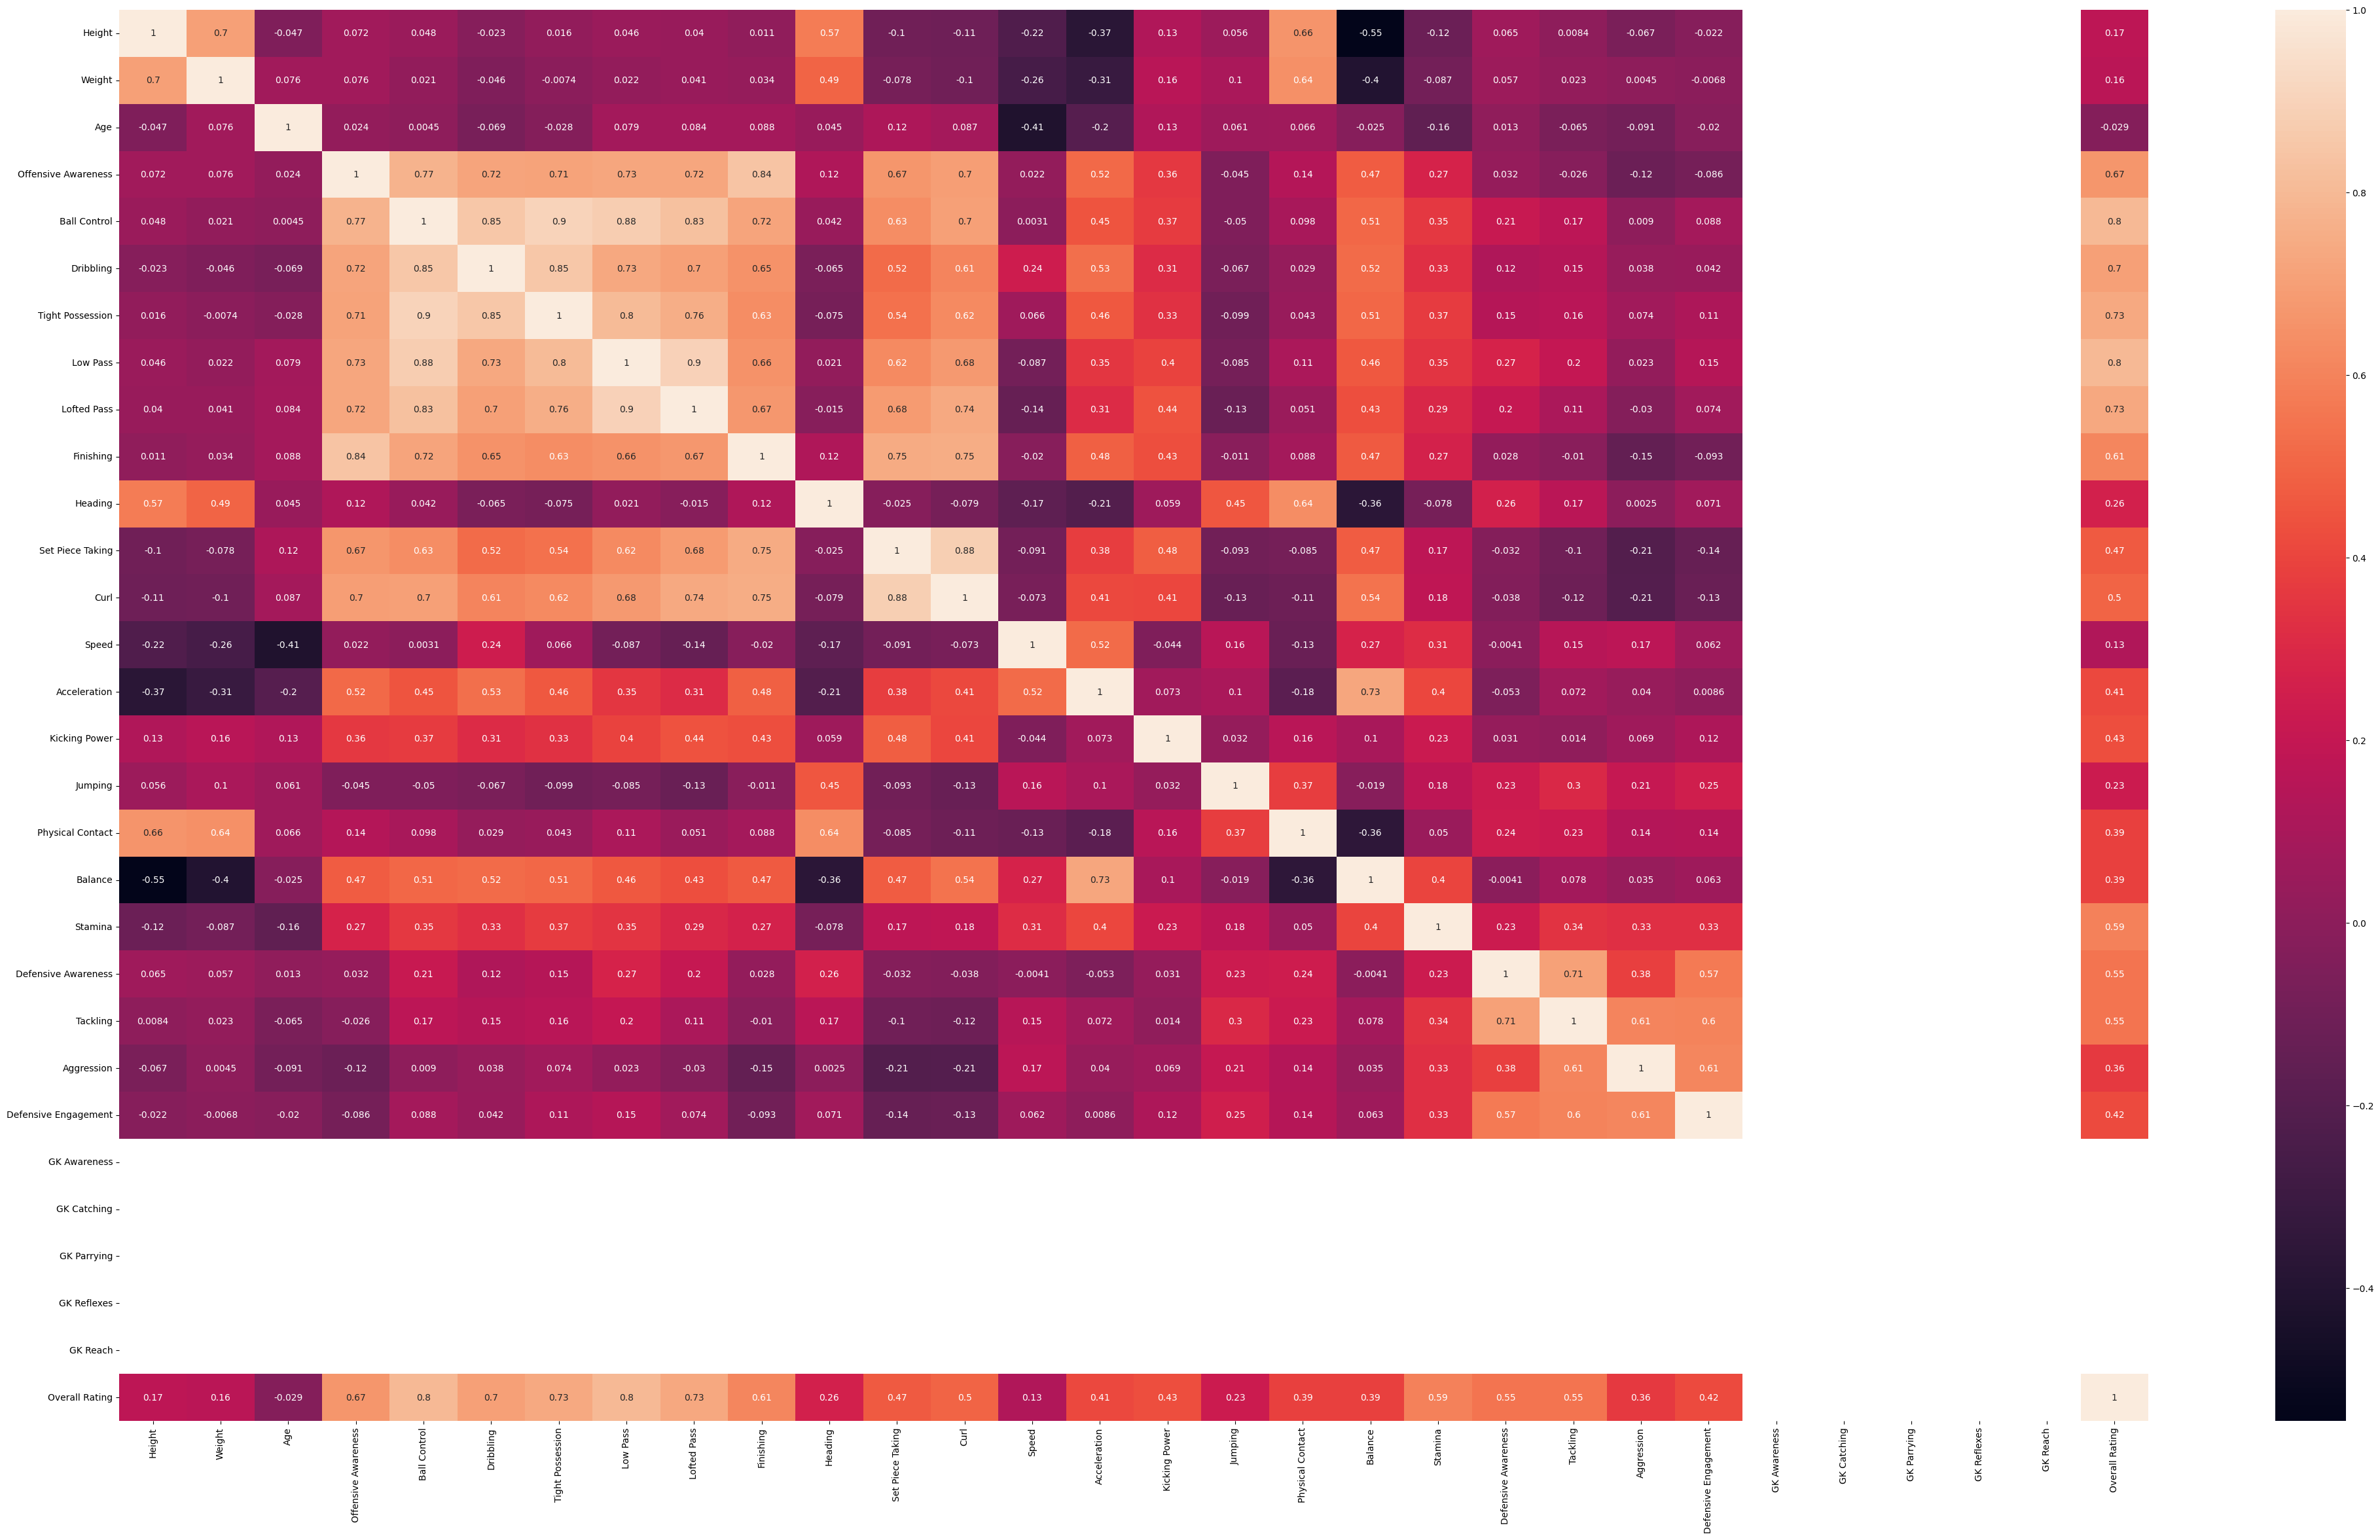

In [7]:
plt.figure(figsize=(50,28))
sns.heatmap(df.corr(), annot = True)

As we can see in the heatmap above overall rating is not correlated significantly with age, weight
and

In [8]:
df = df.drop(['Age','Weight'],axis = 1)

<Axes: xlabel='Lofted Pass', ylabel='Overall Rating'>

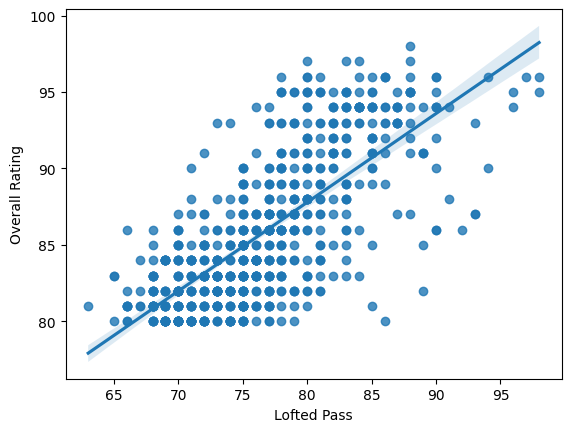

In [9]:
sns.regplot(data = df, x = 'Lofted Pass', y = 'Overall Rating')

<Axes: xlabel='Low Pass', ylabel='Overall Rating'>

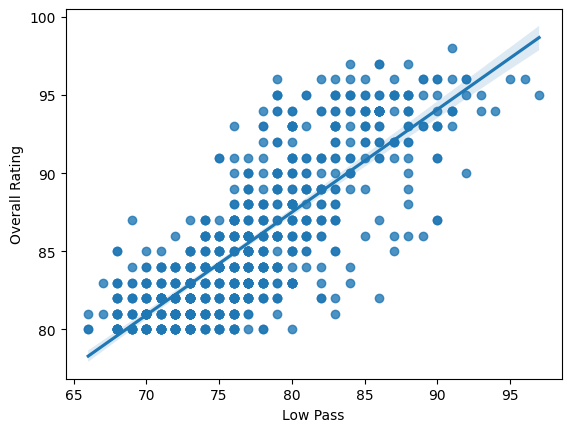

In [10]:
sns.regplot(data = df, x = 'Low Pass', y = 'Overall Rating')

 lofted pass, low pass  looks key stats for a DMF.

##Scaling And Train Test Split

In [11]:
X = df.drop('Overall Rating', axis =1) # Removing the feature we need to predict
y =df['Overall Rating']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
X_train= scaler.fit_transform(X_train)

In [17]:
X_test = scaler.transform(X_test)

In [18]:
X_train.shape

(584, 27)

In [19]:
X_test.shape

(147, 27)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [21]:
model = Sequential()

model.add(Dense(27,activation='relu'))
model.add(Dense(27,activation='relu'))
model.add(Dense(27,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [22]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=8,epochs=200)

Epoch 1/200
73/73 [==============================] - 2s 8ms/step - loss: 6831.0356 - val_loss: 5346.3081
Epoch 2/200
73/73 [==============================] - 0s 6ms/step - loss: 1949.9818 - val_loss: 96.9464
Epoch 3/200
73/73 [==============================] - 0s 5ms/step - loss: 82.7162 - val_loss: 77.4997
Epoch 4/200
73/73 [==============================] - 0s 6ms/step - loss: 73.0459 - val_loss: 69.7673
Epoch 5/200
73/73 [==============================] - 1s 11ms/step - loss: 64.3271 - val_loss: 61.8160
Epoch 6/200
73/73 [==============================] - 0s 6ms/step - loss: 57.7872 - val_loss: 52.2129
Epoch 7/200
73/73 [==============================] - 0s 3ms/step - loss: 49.3761 - val_loss: 45.1472
Epoch 8/200
73/73 [==============================] - 0s 3ms/step - loss: 44.0072 - val_loss: 39.9569
Epoch 9/200
73/73 [==============================] - 0s 3ms/step - loss: 39.2057 - val_loss: 35.5392
Epoch 10/200
73/73 [==============================] - 0s 3ms/step - loss: 35.3461 - 

In [23]:
model.save('DMF_stats_predictor.h5')

# Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error
X_test
predictions = model.predict(X_test)
mean_absolute_error(y_test,predictions)